# Groupi code

* **Run in Colab**
* run the first cell, and the precessing will shotdown, then run the code from the second cell



In [1]:
## Environment
!pip install swig
!pip install wrds
!pip install pyportfolioopt
## install finrl library
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 13.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.0/3.0 MB 14.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.50 which is incompatible.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/usr/local/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])



In [3]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

In [4]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TRADE_START_DATE = '2021-10-01'
TRADE_END_DATE = '2023-12-01'

In [5]:
my_custom_tickers = ["AAPL", "GOOGL", "AMZN", "TSLA", "MSFT"]
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = my_custom_tickers).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (17388, 8)


In [6]:
# print(config_tickers.DOW_30_TICKER)
print(my_custom_tickers)

['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'MSFT']


In [7]:
df.shape

(17388, 8)

In [8]:
df.sort_values(['date','tic'],ignore_index=True).head()

date       open       high        low      close     volume    tic  \
0  2010-01-04   7.622500   7.660714   7.585000   6.478999  493729600   AAPL   
1  2010-01-04   6.812500   6.830500   6.657000   6.695000  151998000   AMZN   
2  2010-01-04  15.689439  15.753504  15.621622  15.684434   78169752  GOOGL   
3  2010-01-04  30.620001  31.100000  30.590000  23.474924   38409100   MSFT   
4  2010-01-05   7.664286   7.699643   7.616071   6.490200  601904800   AAPL   

   day  
0    0  
1    0  
2    0  
3    0  
4    1

In [9]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (3501, 8)
Successfully added vix
Successfully added turbulence index


In [10]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [11]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

date    tic       open       high        low      close       volume  \
0  2010-01-04   AAPL   7.622500   7.660714   7.585000   6.478999  493729600.0   
1  2010-01-04   AMZN   6.812500   6.830500   6.657000   6.695000  151998000.0   
2  2010-01-04  GOOGL  15.689439  15.753504  15.621622  15.684434   78169752.0   
3  2010-01-04   MSFT  30.620001  31.100000  30.590000  23.474924   38409100.0   
4  2010-01-05   AAPL   7.664286   7.699643   7.616071   6.490200  601904800.0   
5  2010-01-05   AMZN   6.671500   6.774000   6.590500   6.734500  177038000.0   
6  2010-01-05  GOOGL  15.695195  15.711712  15.554054  15.615365  120067812.0   
7  2010-01-05   MSFT  30.850000  31.100000  30.639999  23.482506   49749600.0   
8  2010-01-06   AAPL   7.656429   7.686786   7.526786   6.386965  552160000.0   
9  2010-01-06   AMZN   6.730000   6.736500   6.582500   6.612500  143576000.0   

   day      macd    boll_ub    boll_lb      rsi_30      cci_30       dx_30  \
0  0.0  0.000000   6.500440   6.468759  100.000000   66.666667  100.000000   
1  0.0  0.000000   6.500440   6.468759  100.000000   66.666667  100.000000   
2  0.0  0.000000   6.500440   6.468759  100.000000   66.666667  100.000000   
3  0.0  0.000000   6.500440   6.468759  100.000000   66.666667  100.000000   
4  1.0  0.000251   6.500440   6.468759  100.000000   66.666667  100.000000   
5  1.0  0.000886   6.770611   6.658889  100.000000  -66.666667  100.000000   
6  1.0 -0.001550  15.747578  15.552221    0.000000  -66.666667  100.000000   
7  1.0  0.000170  23.489437  23.467993  100.000000   66.666667  100.000000   
8  2.0 -0.002881   6.565348   6.338761    9.492655 -100.000000   42.057878   
9  2.0 -0.002654   6.805167   6.556167   23.837198 -100.000000  100.000000   

   close_30_sma  close_60_sma        vix  turbulence  
0      6.478999      6.478999  20.040001         0.0  
1      6.695000      6.695000  20.040001         0.0  
2     15.684434     15.684434  20.040001         0.0  
3     23.474924     23.474924  20.040001         0.0  
4      6.484599      6.484599  19.350000         0.0  
5      6.714750      6.714750  19.350000         0.0  
6     15.649899     15.649899  19.350000         0.0  
7     23.478715     23.478715  19.350000         0.0  
8      6.452054      6.452054  19.160000         0.0  
9      6.680667      6.680667  19.160000         0.0

In [12]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [13]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

11828
2176


In [14]:
train.tail()

date    tic        open        high         low       close  \
2955  2021-09-29   MSFT  285.100006  286.769989  283.010010  278.381348   
2956  2021-09-30   AAPL  143.660004  144.380005  141.279999  139.697647   
2956  2021-09-30   AMZN  165.800003  166.392502  163.699493  164.251999   
2956  2021-09-30  GOOGL  134.261505  135.542496  133.556000  133.675995   
2956  2021-09-30   MSFT  285.709991  287.829987  281.619995  276.342529   

          volume  day      macd     boll_ub     boll_lb     rsi_30  \
2955  26353700.0  2.0 -1.289764  302.771292  280.696464  46.096637   
2956  89056700.0  3.0 -1.623113  155.379425  137.039821  45.507952   
2956  56848000.0  3.0 -1.081312  178.384997  164.074204  43.656332   
2956  37996000.0  3.0 -0.802626  147.394094  134.558908  46.666809   
2956  32343600.0  3.0 -2.148349  303.568457  277.947693  44.758891   

          cci_30      dx_30  close_30_sma  close_60_sma        vix  turbulence  
2955 -257.436203  37.416130    292.687962    285.825230  22.559999    1.994342  
2956 -134.683033  34.591874    146.710491    145.684658  23.139999    0.507033  
2956  -81.690206  34.267697    169.645601    172.062409  23.139999    0.507033  
2956 -191.614920  33.114694    141.198984    136.805125  23.139999    0.507033  
2956 -242.878356  39.799221    292.400105    285.866478  23.139999    0.507033

In [15]:
trade.head()

date    tic        open        high         low       close  \
0  2021-10-01   AAPL  141.899994  142.919998  139.110001  140.832962   
0  2021-10-01   AMZN  164.450500  165.458496  162.796997  164.162994   
0  2021-10-01  GOOGL  134.447495  136.910507  134.072998  136.542999   
0  2021-10-01   MSFT  282.119995  289.980011  281.290009  283.380463   
1  2021-10-04   AAPL  141.759995  142.210007  138.270004  137.367706   

       volume  day      macd     boll_ub     boll_lb     rsi_30      cci_30  \
0  94639600.0  4.0 -1.696606  154.755083  136.578169  46.927701 -142.214135   
0  56712000.0  4.0 -1.350730  178.531089  163.028811  43.571885  -98.534373   
0  35360000.0  4.0 -0.913859  147.251483  134.027118  50.568036 -149.367409   
0  30086300.0  4.0 -2.235117  303.204253  277.130736  49.946085 -174.702255   
1  98322000.0  0.0 -2.011282  154.158470  135.678093  43.360595 -158.802014   

       dx_30  close_30_sma  close_60_sma        vix  turbulence  
0  41.749873    146.577209    145.678475  21.100000    6.473126  
0  36.982555    169.804784    171.688951  21.100000    6.473126  
0  23.408883    141.227751    136.996775  21.100000    6.473126  
0  31.518775    292.149495    286.065953  21.100000    6.473126  
1  44.273379    146.279384    145.583815  22.959999    3.447950

In [16]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [17]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 4, State Space: 41


In [18]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [19]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [20]:
agent = DRLAgent(env = env_train)

if_using_ddpg = True



In [21]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device
Logging to results/ddpg


In [22]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=80000) if if_using_ddpg else None

-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 152        |
|    time_elapsed    | 77         |
|    total_timesteps | 11828      |
| train/             |            |
|    actor_loss      | 1.83e+03   |
|    critic_loss     | 2.62e+03   |
|    learning_rate   | 0.001      |
|    n_updates       | 8871       |
|    reward          | -11.575538 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 137        |
|    time_elapsed    | 171        |
|    total_timesteps | 23656      |
| train/             |            |
|    actor_loss      | 1.01e+03   |
|    critic_loss     | 387        |
|    learning_rate   | 0.001      |
|    n_updates       | 20699      |
|    reward          | -11.575538 |
-----------------------------------
day: 2956, episode: 10
begin_total_asset: 1000000.00
end_total_a

In [23]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [24]:
insample_risk_indicator.vix.describe()

count    2957.000000
mean       18.105293
std         7.272476
min         9.140000
25%        13.370000
50%        16.209999
75%        20.629999
max        82.690002
Name: vix, dtype: float64

In [25]:
insample_risk_indicator.vix.quantile(0.996)

57.212001831054636

In [26]:
insample_risk_indicator.turbulence.describe()

count    2957.000000
mean        4.091170
std        10.903797
min         0.000000
25%         0.746151
50%         1.762086
75%         3.798041
max       294.688105
Name: turbulence, dtype: float64

In [27]:
insample_risk_indicator.turbulence.quantile(0.996)

81.51752932939482

In [28]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [29]:
trade.head()

date    tic        open        high         low       close  \
0  2021-10-01   AAPL  141.899994  142.919998  139.110001  140.832962   
0  2021-10-01   AMZN  164.450500  165.458496  162.796997  164.162994   
0  2021-10-01  GOOGL  134.447495  136.910507  134.072998  136.542999   
0  2021-10-01   MSFT  282.119995  289.980011  281.290009  283.380463   
1  2021-10-04   AAPL  141.759995  142.210007  138.270004  137.367706   

       volume  day      macd     boll_ub     boll_lb     rsi_30      cci_30  \
0  94639600.0  4.0 -1.696606  154.755083  136.578169  46.927701 -142.214135   
0  56712000.0  4.0 -1.350730  178.531089  163.028811  43.571885  -98.534373   
0  35360000.0  4.0 -0.913859  147.251483  134.027118  50.568036 -149.367409   
0  30086300.0  4.0 -2.235117  303.204253  277.130736  49.946085 -174.702255   
1  98322000.0  0.0 -2.011282  154.158470  135.678093  43.360595 -158.802014   

       dx_30  close_30_sma  close_60_sma        vix  turbulence  
0  41.749873    146.577209    145.678475  21.100000    6.473126  
0  36.982555    169.804784    171.688951  21.100000    6.473126  
0  23.408883    141.227751    136.996775  21.100000    6.473126  
0  31.518775    292.149495    286.065953  21.100000    6.473126  
1  44.273379    146.279384    145.583815  22.959999    3.447950

In [30]:
# trained_moedl = trained_a2c
# df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
#     model=trained_moedl,
#     environment = e_trade_gym)

In [31]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [32]:
print(df_account_value_ddpg, df_actions_ddpg)

           date  account_value
0    2021-10-01   1.000000e+06
1    2021-10-04   9.991556e+05
2    2021-10-05   9.998271e+05
3    2021-10-06   1.000676e+06
4    2021-10-07   1.001963e+06
..          ...            ...
539  2023-11-22   1.073398e+06
540  2023-11-24   1.069265e+06
541  2023-11-27   1.071866e+06
542  2023-11-28   1.071550e+06
543  2023-11-29   1.066027e+06

[544 rows x 2 columns]             AAPL  AMZN  GOOGL  MSFT
date                               
2021-10-01   100   100      0     0
2021-10-04   100   100      0     0
2021-10-05   100   100      0     0
2021-10-06   100   100      0     0
2021-10-07   100   100      0     0
...          ...   ...    ...   ...
2023-11-21     0     0      0     0
2023-11-22     0     0      0     0
2023-11-24     0     0      0     0
2023-11-27     0     0      0     0
2023-11-28     0     0      0     0

[543 rows x 4 columns]


In [33]:
# trained_moedl = trained_ppo
# df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
#     model=trained_moedl,
#     environment = e_trade_gym)

In [34]:
# trained_moedl = trained_td3
# df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
#     model=trained_moedl,
#     environment = e_trade_gym)

In [35]:
# trained_moedl = trained_sac
# df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
#     model=trained_moedl,
#     environment = e_trade_gym)

In [36]:
df_account_value_ddpg.shape

(544, 2)

In [37]:
# df_dji = YahooDownloader(
#     start_date=TRADE_START_DATE, end_date=TRADE_END_DATE, ticker_list=["dji"]
# ).fetch_data()
# df_dji = df_dji[["date", "close"]]
# fst_day = df_dji["close"][0]
# dji = pd.merge(
#     df_dji["date"],
#     df_dji["close"].div(fst_day).mul(1000000),
#     how="outer",
#     left_index=True,
#     right_index=True,
# ).set_index("date")

In [38]:
# # df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
# df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
# # df_account_value_a2c.to_csv("df_account_value_a2c.csv")
# #baseline stats

# print("==============Get Baseline Stats===========")
# df_dji_ = get_baseline(
#         ticker="^DJI",
#         start = TRADE_START_DATE,
#         end = TRADE_END_DATE)
# stats = backtest_stats(df_dji_, value_col_name = 'close')
# df_dji = pd.DataFrame()
# df_dji['date'] = df_account_value_ddpg['date']
# df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]


In [39]:
# ## ddpg stat report
# print("==============Get Backtest Results===========")
# now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

# perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
# perf_stats_all = pd.DataFrame(perf_stats_all)
# perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

In [40]:
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)

df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_ddpg['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji.to_csv("df_dji+.csv")

print("==============Get Baseline Stats ddpg===========")
stats_dji = backtest_stats(df_dji_, value_col_name = 'close')
stats_ddpg = backtest_stats(df_account_value_ddpg, value_col_name = 'account_value')

import pandas as pd

# ÂÅáËÆæ stats_dji Âíå stats_ddpg ÊòØÂåÖÂê´ÁªüËÆ°‰ø°ÊÅØÁöÑ DataFrame

# ÂÜôÂÖ• stats_dji Âà∞ CSV Êñá‰ª∂
stats_dji.to_csv('stats_dji.csv', index=False)

# ÂÜôÂÖ• stats_ddpg Âà∞ CSV Êñá‰ª∂
stats_ddpg.to_csv('stats_ddpg.csv', index=False)


==============Get Baseline Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (545, 8)
==============Get Baseline Stats ddpg===========
Annual return          0.021610
Cumulative returns     0.047323
Annual volatility      0.160609
Sharpe ratio           0.213591
Calmar ratio           0.098491
Stability              0.009038
Max drawdown          -0.219408
Omega ratio            1.036754
Sortino ratio          0.302427
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.012362
Daily value at risk   -0.020099
dtype: float64
Annual return          0.030062
Cumulative returns     0.066027
Annual volatility      0.308910
Sharpe ratio           0.250299
Calmar ratio           0.073338
Stability              0.021319
Max drawdown          -0.409907
Omega ratio            1.043781
Sortino ratio          0.356370
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.

                    ddpg           dji
date                                  
2021-10-01  1.000000e+06  1.000000e+06
2021-10-04  9.991556e+05  9.905746e+05
2021-10-05  9.998271e+05  9.996566e+05
2021-10-06  1.000676e+06  1.002637e+06
2021-10-07  1.001963e+06  1.012483e+06
...                  ...           ...
2023-11-22  1.073398e+06  1.027576e+06
2023-11-24  1.069265e+06  1.030987e+06
2023-11-27  1.071866e+06  1.029336e+06
2023-11-28  1.071550e+06  1.031769e+06
2023-11-29  1.066027e+06  1.032161e+06

[544 rows x 2 columns]


<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

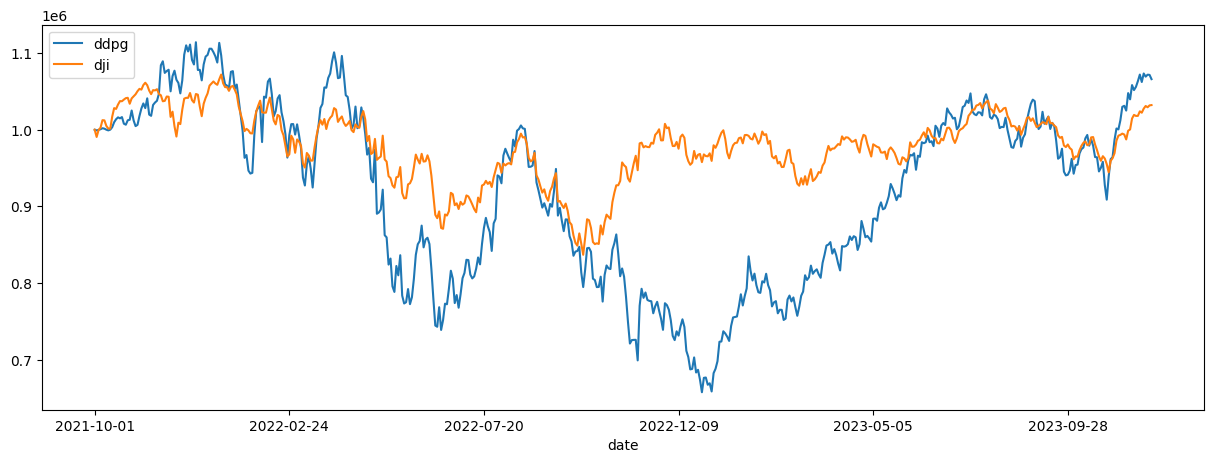

In [41]:



# df_result_a2c = (
#     df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
#     if if_using_a2c
#     else None
# )
df_result_ddpg = (
    df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
    if if_using_ddpg
    else None
)
# df_result_ppo = (
#     df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
#     if if_using_ppo
#     else None
# )
# df_result_td3 = (
#     df_account_value_td3.set_index(df_account_value_td3.columns[0])
#     if if_using_td3
#     else None
# )
# df_result_sac = (
#     df_account_value_sac.set_index(df_account_value_sac.columns[0])
#     if if_using_sac
#     else None
# )

result = pd.DataFrame(
    {
        # "a2c": df_result_a2c["account_value"] if if_using_a2c else None,
        "ddpg": df_result_ddpg["account_value"] if if_using_ddpg else None,
        # "ppo": df_result_ppo["account_value"] if if_using_ppo else None,
        # "td3": df_result_td3["account_value"] if if_using_td3 else None,
        # "sac": df_result_sac["account_value"] if if_using_sac else None,
        # "mvo": MVO_result["Mean Var"],
        "dji": df_dji["account_value"],
    }
)

print(result)

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()
# plt.show()

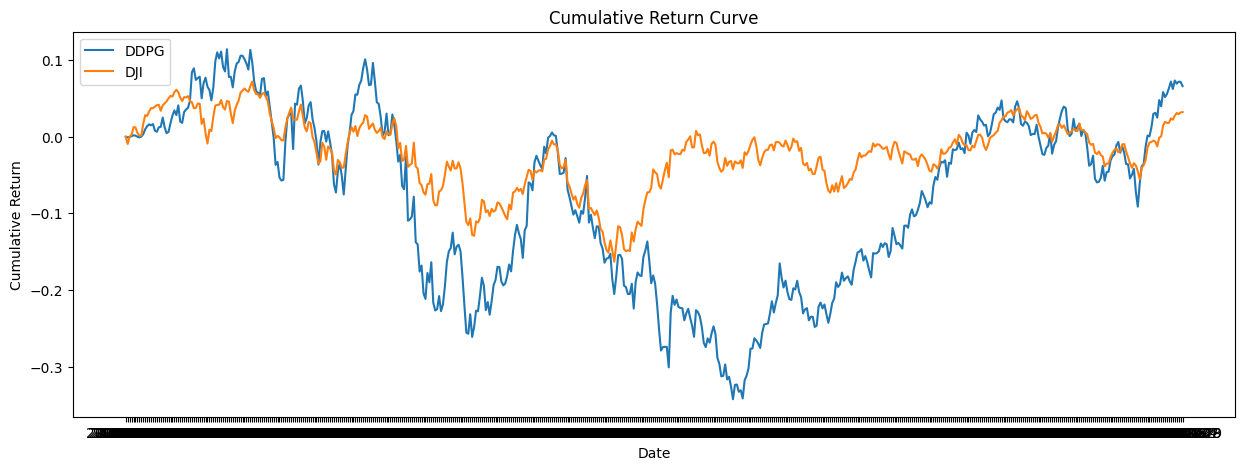

In [42]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import matplotlib.pyplot as plt

# ËØªÂèñÊÇ®ÁöÑÊï∞ÊçÆ
df = result

# ËÆ°ÁÆóÁ¥ØÁßØÂõûÊä•Áéá
df["cum_ddpg"] = df["ddpg"] / df["ddpg"].iloc[0] - 1
df["cum_dji"] = df["dji"] / df["dji"].iloc[0] - 1

# ÁªòÂà∂Á¥ØÁßØÂõûÊä•Êõ≤Á∫ø
plt.figure(figsize=(15,5))
plt.plot(df["cum_ddpg"], label="DDPG")
plt.plot(df["cum_dji"], label="DJI")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Curve")
plt.legend()
# plt.grid()
plt.show()


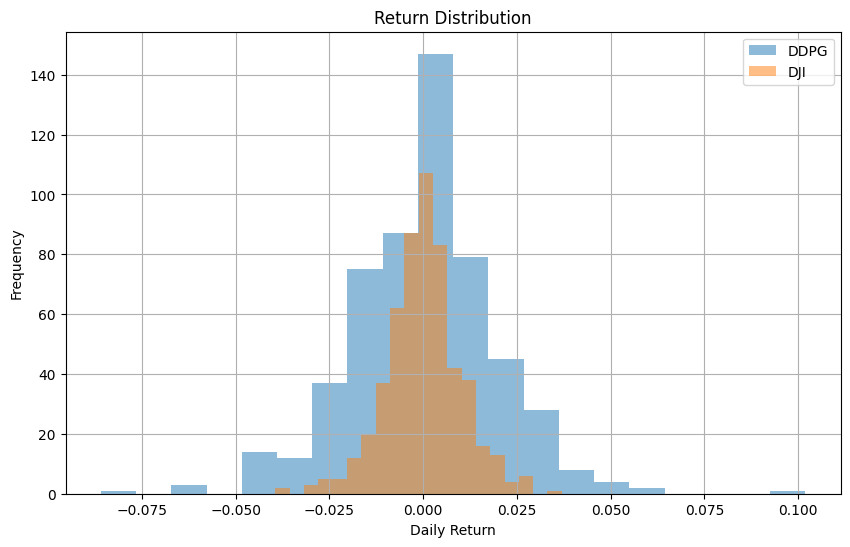

In [43]:
# ËÆ°ÁÆóÊó•Êî∂ÁõäÁéá
df["ret_ddpg"] = df["ddpg"].pct_change()
df["ret_dji"] = df["dji"].pct_change()

# ÁªòÂà∂Êî∂ÁõäÁéáÂàÜÂ∏É
plt.figure(figsize=(10, 6))
plt.hist(df["ret_ddpg"], bins=20, alpha=0.5, label="DDPG")
plt.hist(df["ret_dji"], bins=20, alpha=0.5, label="DJI")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Return Distribution")
plt.legend()
plt.grid()
plt.show()

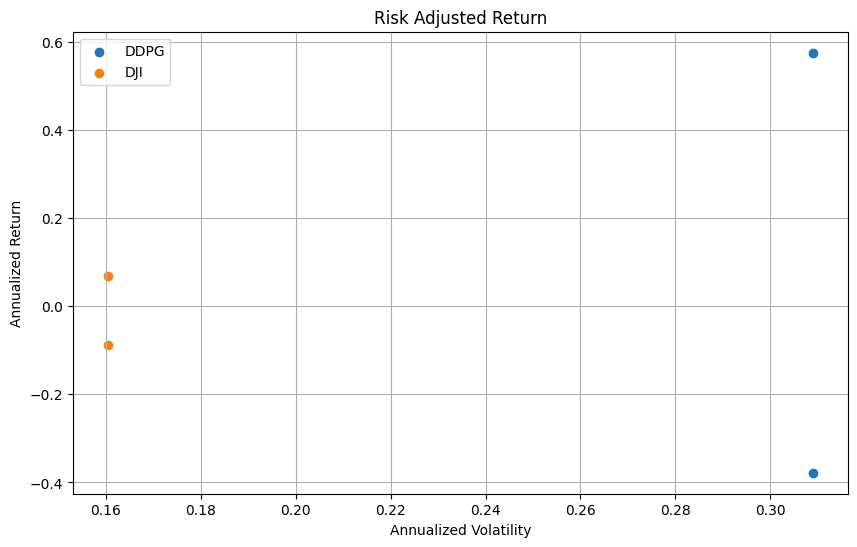

In [44]:
# ËΩ¨Êç¢ÊÇ®ÁöÑÊï∞ÊçÆÁöÑÁ¥¢Âºï‰∏∫Êó•ÊúüÊó∂Èó¥Ê†ºÂºè
df.index = pd.to_datetime(df.index)

# ËÆ°ÁÆóÊó•Êî∂ÁõäÁéá
df["ret_ddpg"] = df["ddpg"].pct_change()
df["ret_dji"] = df["dji"].pct_change()

# ËÆ°ÁÆóÂπ¥ÂåñÊî∂ÁõäÁéáÂíåÊ≥¢Âä®Áéá
df_annual = df.resample("Y").last()
df_annual["ret_ddpg"] = df_annual["ddpg"] / df_annual["ddpg"].shift(1) - 1
df_annual["ret_dji"] = df_annual["dji"] / df_annual["dji"].shift(1) - 1
df_annual["vol_ddpg"] = df["ret_ddpg"].std() * np.sqrt(252)
df_annual["vol_dji"] = df["ret_dji"].std() * np.sqrt(252)

# ËÆ°ÁÆóÂ§èÊôÆÊØîÁéá
df_annual["sharpe_ddpg"] = (df_annual["ret_ddpg"] - 0.02) / df_annual["vol_ddpg"]
df_annual["sharpe_dji"] = (df_annual["ret_dji"] - 0.02) / df_annual["vol_dji"]

# ÁªòÂà∂È£éÈô©Ë∞ÉÊï¥Êî∂ÁõäÁéá
plt.figure(figsize=(10, 6))
plt.scatter(df_annual["vol_ddpg"], df_annual["ret_ddpg"], label="DDPG")
plt.scatter(df_annual["vol_dji"], df_annual["ret_dji"], label="DJI")
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk Adjusted Return")
plt.legend()
plt.grid()
plt.show()

<ipython-input-45-947794604a50>:23: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.boxplot(data=[df["ret_ddpg"], df_weekly["ret_ddpg"], df_monthly["ret_ddpg"], df_annual["ret_ddpg"]],


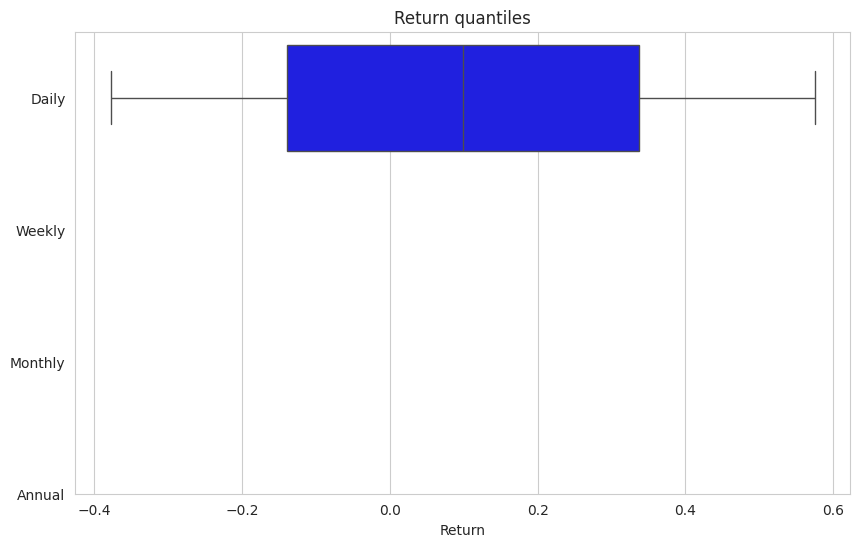

In [45]:
# ËÆ°ÁÆóÂë®Êî∂ÁõäÁéá
df_weekly = df.resample("W").last()
df_weekly["ret_ddpg"] = df_weekly["ddpg"] / df_weekly["ddpg"].shift(1) - 1

# ËÆ°ÁÆóÊúàÊî∂ÁõäÁéá
df_monthly = df.resample("M").last()
df_monthly["ret_ddpg"] = df_monthly["ddpg"] / df_monthly["ddpg"].shift(1) - 1

# ËÆ°ÁÆóÂπ¥Êî∂ÁõäÁéá
df_annual = df.resample("Y").last()
df_annual["ret_ddpg"] = df_annual["ddpg"] / df_annual["ddpg"].shift(1) - 1


# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆÈ£éÊ†ºÂíåÂ§ßÂ∞è
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# ÁªòÂà∂Ê∞¥Âπ≥ÁÆ±Á∫øÂõæ
sns.boxplot(data=[df["ret_ddpg"], df_weekly["ret_ddpg"], df_monthly["ret_ddpg"], df_annual["ret_ddpg"]],
            orient="h",
            palette=["blue", "green", "orange", "red"])

# ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
plt.title("Return quantiles")
plt.yticks([0, 1, 2, 3], ["Daily", "Weekly", "Monthly", "Annual"])
plt.xlabel("Return")
plt.show()
